In [1]:


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')




In [2]:
df  = pd.read_excel("tourismData.xlsx",'Tourism')
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [3]:


df.isnull().sum()

CustomerID                   0
ProdTaken                    0
Age                        226
TypeofContact               25
CityTier                     0
DurationOfPitch            251
Occupation                   0
Gender                       0
NumberOfPersonVisited        0
NumberOfFollowups           45
ProductPitched               0
PreferredPropertyStar       26
MaritalStatus                0
NumberOfTrips              140
Passport                     0
PitchSatisfactionScore       0
OwnCar                       0
NumberOfChildrenVisited     66
Designation                  0
MonthlyIncome              233
dtype: int64

In [4]:

df['Age'].fillna(df['Age'].median(),inplace=True)
df['TypeofContact'].fillna(df['TypeofContact'].mode()[0],inplace=True)
df['DurationOfPitch'].fillna(df['DurationOfPitch'].median(),inplace=True)
df['NumberOfFollowups'].fillna(df['NumberOfFollowups'].median(),inplace=True)
df['PreferredPropertyStar'].fillna(df['PreferredPropertyStar'].median(),inplace=True)
df['NumberOfTrips'].fillna(df['NumberOfTrips'].median(),inplace=True)
df['NumberOfChildrenVisited'].fillna(df['NumberOfChildrenVisited'].median(),inplace=True)
df['MonthlyIncome'].fillna(df['MonthlyIncome'].median(),inplace=True)



df.isna().sum()

CustomerID                 0
ProdTaken                  0
Age                        0
TypeofContact              0
CityTier                   0
DurationOfPitch            0
Occupation                 0
Gender                     0
NumberOfPersonVisited      0
NumberOfFollowups          0
ProductPitched             0
PreferredPropertyStar      0
MaritalStatus              0
NumberOfTrips              0
Passport                   0
PitchSatisfactionScore     0
OwnCar                     0
NumberOfChildrenVisited    0
Designation                0
MonthlyIncome              0
dtype: int64

In [5]:
df = df[['Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisited',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisited', 'Designation', 'MonthlyIncome','ProdTaken']]

df

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome,ProdTaken
0,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0,1
1,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0,0
2,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0,1
3,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0,0
4,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0,1
4884,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0,1
4885,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0,1
4886,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0,1


<AxesSubplot:>

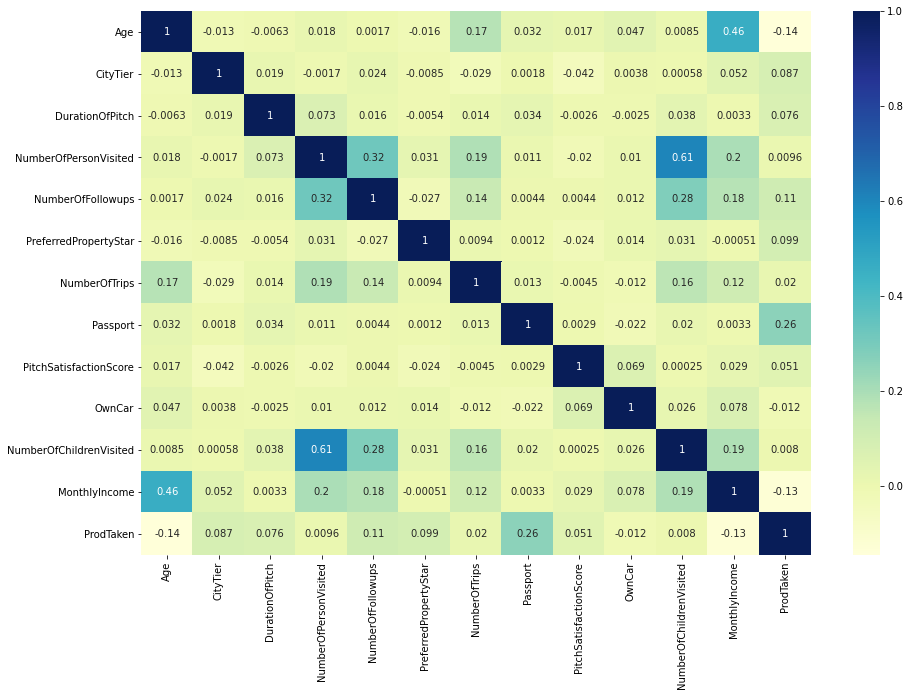

In [6]:
plt.figure(figsize=(15,10))
df.corr()
sns.heatmap(df.corr(),cmap="YlGnBu", annot=True)

In [7]:

smallValueFeature = ['TypeofContact','Occupation','Gender','ProductPitched','MaritalStatus','Designation',
                     'CityTier','NumberOfPersonVisited','NumberOfFollowups','PreferredPropertyStar',
                     'Passport','PitchSatisfactionScore','OwnCar','NumberOfChildrenVisited']

longValueFeature = ['Age','DurationOfPitch','NumberOfTrips','MonthlyIncome']


In [8]:
ProductTaken = df[df['ProdTaken']==1]

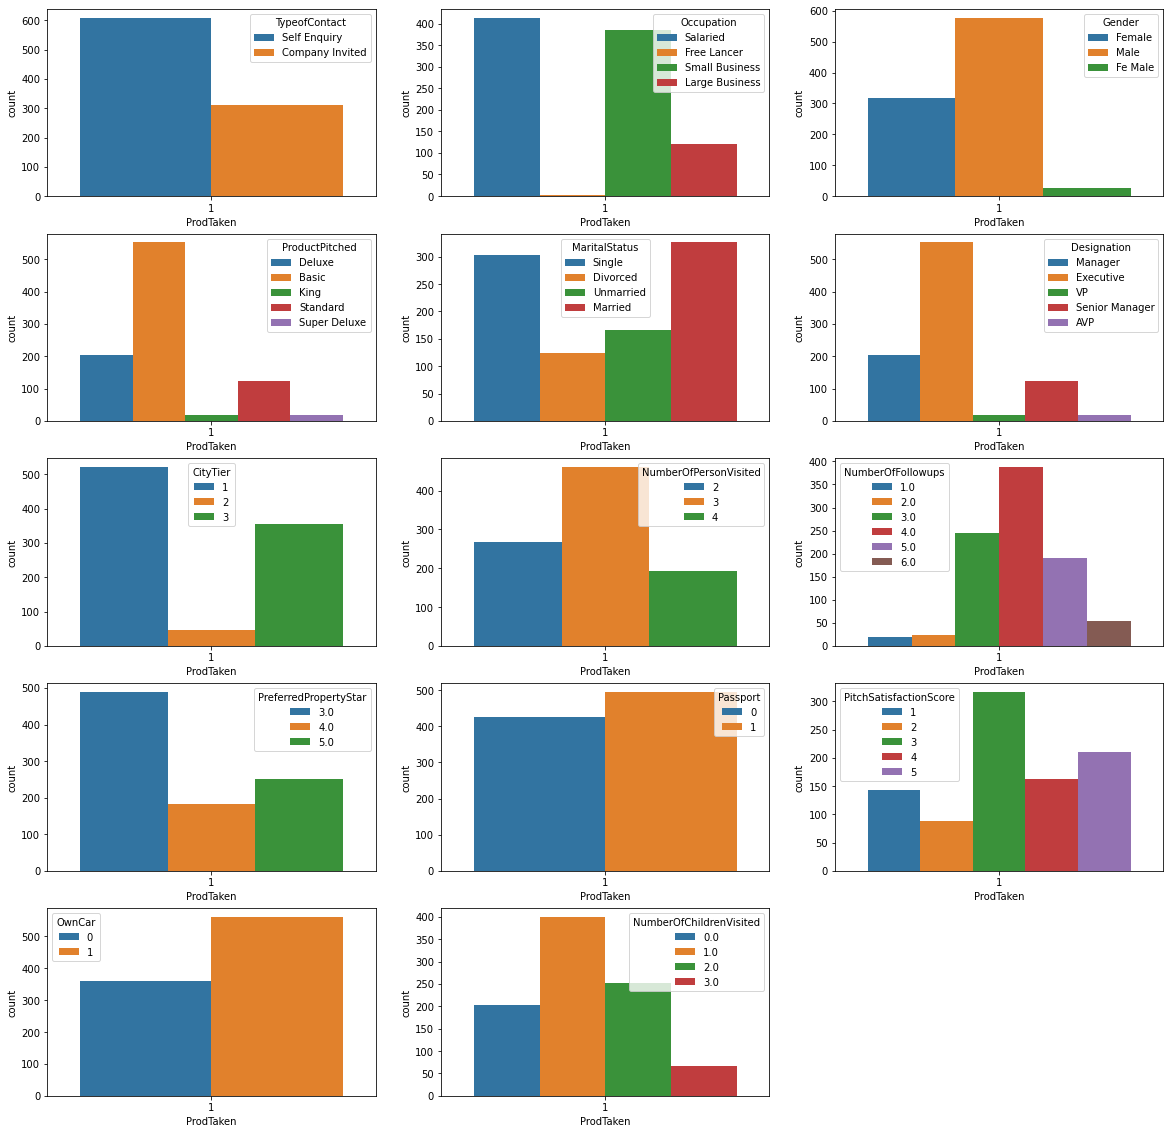

In [9]:

plt.figure(figsize=(20,20))
for i in enumerate(smallValueFeature):
    plt.subplot(5,3,i[0]+1)
    sns.countplot(data=ProductTaken,x=ProductTaken['ProdTaken'],hue=ProductTaken[i[1]])
        


#Obvservations
#
1) Self Enquiry customer is morelikely to buy a product than Company Invited
#
2) Saliried and Small business owners are more likely to buy a product
#
3) Male are frequent traveller than Female
#
4) People are opting Basic product than premium
#
5) Unmarried people are more likey to travel
6) Exectives have bought more pakcage than anyone else
7) Tier One City are more frequent Traveller
8) Family of 3 are more frequest traveller
9) Folloup 4 has more conversions
10) Three start is most popular Hotel
11) passort holders have bough more packages
12) car Owners have more chances of travel.
13) Family with one child have bough more product
###

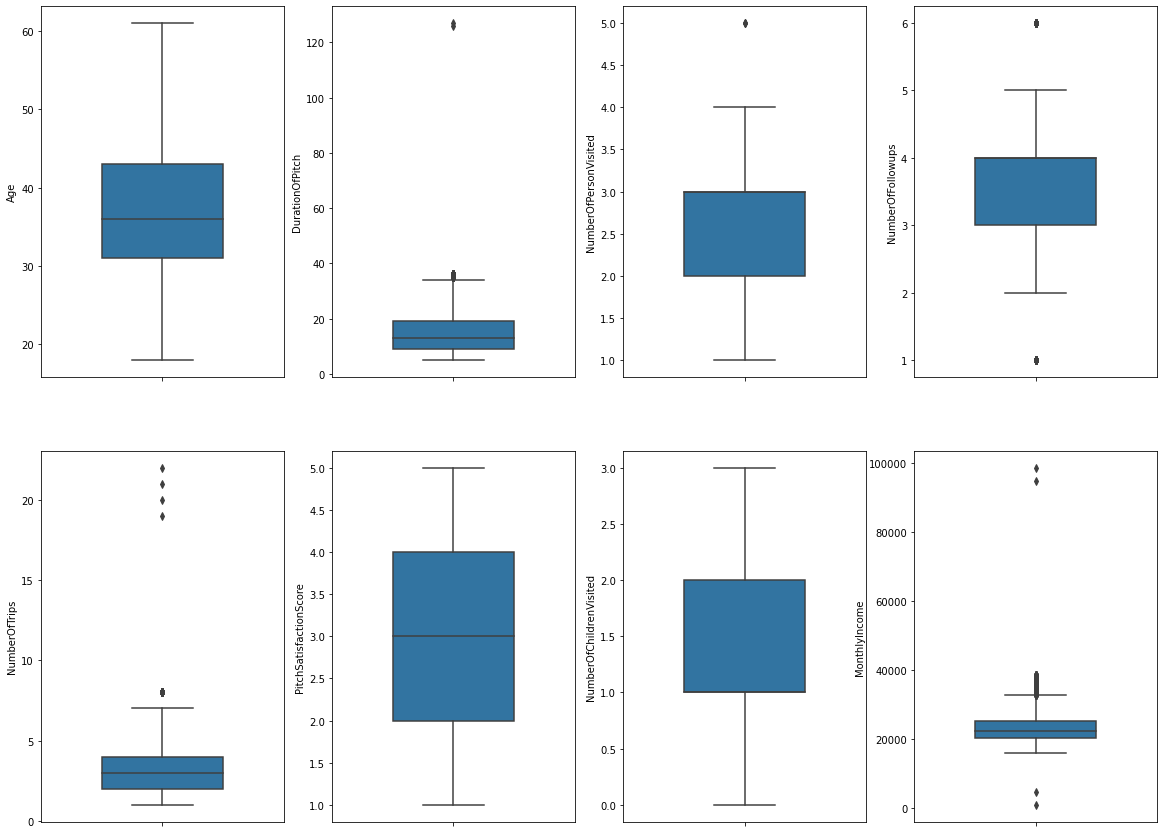

In [10]:
checkOutliers = ['Age','DurationOfPitch','NumberOfPersonVisited','NumberOfFollowups','NumberOfTrips','PitchSatisfactionScore','NumberOfChildrenVisited','MonthlyIncome']

plt.figure(figsize=(20,15))
for i  in enumerate(checkOutliers):
    plt.subplot(2,4,i[0]+1)
    sns.boxplot(data=df,y=df[i[1]],width=0.5)
    

In [11]:
df.skew()

Age                        0.415796
CityTier                   0.736531
DurationOfPitch            1.831803
NumberOfPersonVisited      0.029817
NumberOfFollowups         -0.381849
PreferredPropertyStar      0.903725
NumberOfTrips              1.485204
Passport                   0.920980
PitchSatisfactionScore    -0.127726
OwnCar                    -0.495892
NumberOfChildrenVisited    0.282551
MonthlyIncome              2.023306
ProdTaken                  1.595763
dtype: float64

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Density'>

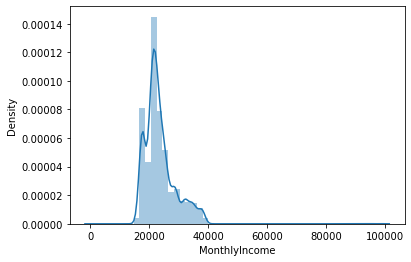

In [12]:
sns.distplot(df['MonthlyIncome'])

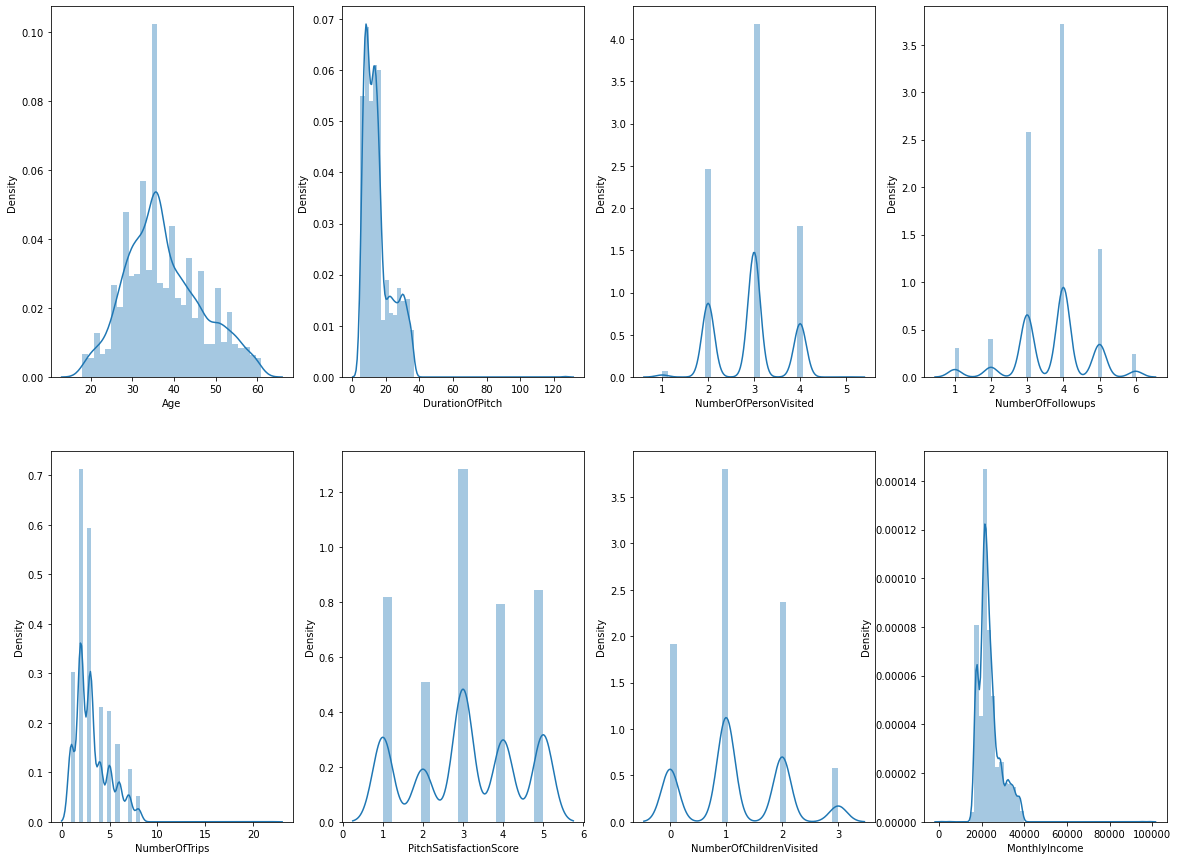

In [13]:

plt.figure(figsize=(20,15))
for i in enumerate(checkOutliers):
    plt.subplot(2,4,i[0]+1)
    sns.distplot(df[i[1]])

In [14]:
from scipy.stats import normaltest
for i in checkOutliers:
    print(i + ": " + str(normaltest(df[i])[1]*100))

Age: 1.4042870631749366e-33
DurationOfPitch: 0.0
NumberOfPersonVisited: 2.1153117393921714e-79
NumberOfFollowups: 5.047249990137504e-34
NumberOfTrips: 0.0
PitchSatisfactionScore: 0.0
NumberOfChildrenVisited: 2.1970009344837837e-42
MonthlyIncome: 0.0


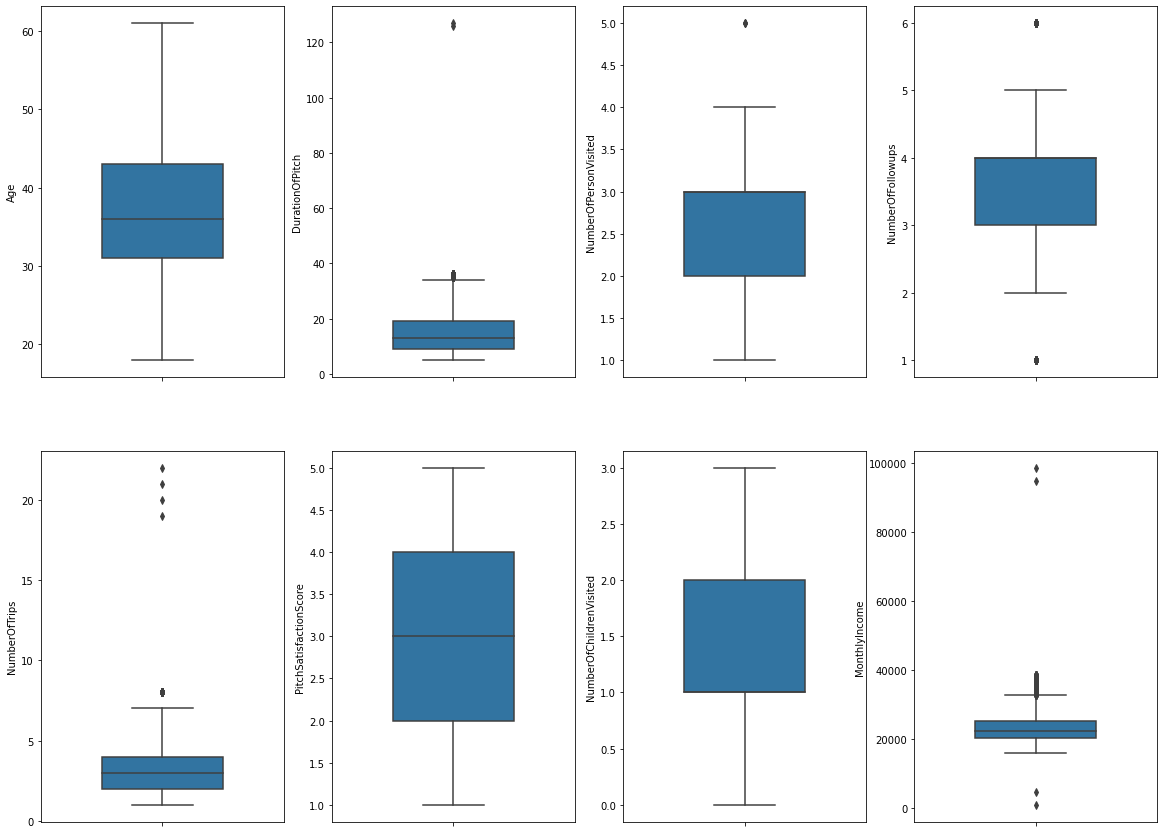

In [15]:
plt.figure(figsize=(20,15))
for i  in enumerate(checkOutliers):
    plt.subplot(2,4,i[0]+1)
    sns.boxplot(data=df,y=df[i[1]],width=0.5)
    

27.0

In [19]:

q1 = df['MonthlyIncome'].quantile(.40)
q3 = df['MonthlyIncome'].quantile(.90)

IQR = q3-q1
upper_limit = q3+(1.5*IQR)
lower_limit = q1-(1.5*IQR)

print("q1: " + str(q1))
print("q3: " + str(q3))
print("IQR: " + str(IQR))

print("upper_limit: " + str(upper_limit))
print("lower_limit: " + str(lower_limit))

LLdata_TrueOrFalse = df['MonthlyIncome']<lower_limit
LLdata_outlier = df[LLdata_TrueOrFalse]

ULdata_TrueOrFalse = df['MonthlyIncome']>upper_limit
ULdata_outlier = df[ULdata_TrueOrFalse]





q1: 21498.600000000002
q3: 31869.9
IQR: 10371.3
upper_limit: 47426.85
lower_limit: 5941.650000000003


,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome,ProdTaken
142,38.0,Self Enquiry,1,9.0,Large Business,Female,2,3.0,Deluxe,3.0,Single,4.0,1,5,0,0.0,Manager,1000.0,0
2586,39.0,Self Enquiry,1,10.0,Large Business,Female,3,4.0,Deluxe,3.0,Single,5.0,1,5,0,1.0,Manager,4678.0,0


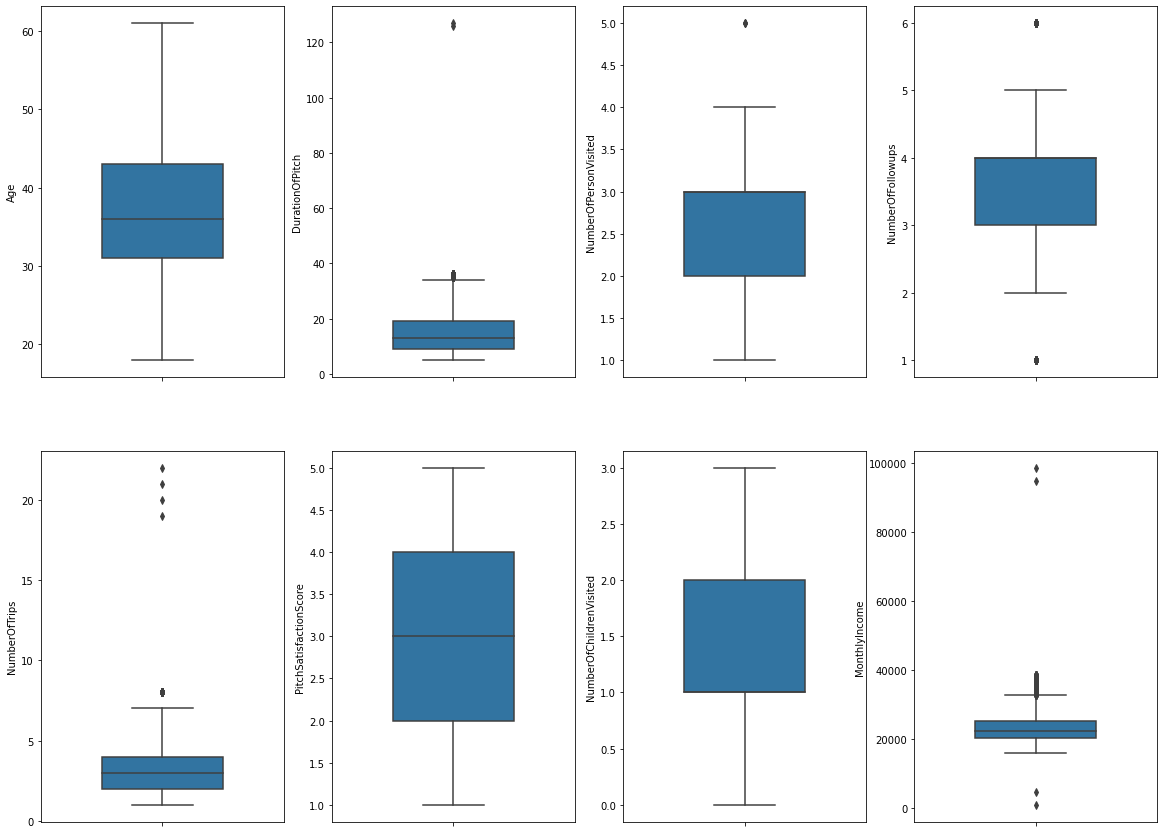

In [20]:
plt.figure(figsize=(20,15))
for i  in enumerate(checkOutliers):
    plt.subplot(2,4,i[0]+1)
    sns.boxplot(data=df,y=df[i[1]],width=0.5)
    